In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

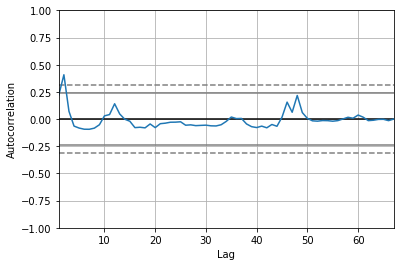

In [5]:
series = pd.read_csv('cluster_2_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
plt.show()

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -435.954
Method:                       css-mle   S.D. of innovations            177.195
Date:                Thu, 26 Sep 2019   AIC                            885.908
Time:                        22:00:20   BIC                            901.235
Sample:                             1   HQIC                           891.964
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3184     10.171      0.425      0.673     -15.616      24.253
ar.L1.D.count    -0.6674      0.121     -5.517      0.000      -0.905      -0.430
ar.L2.D.count     0.0945      0.145     

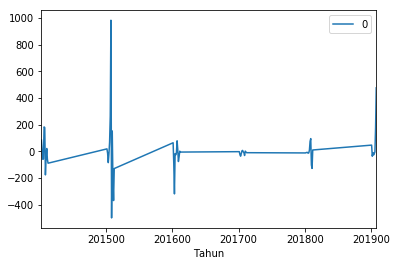

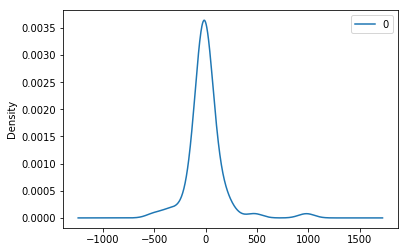

                0
count   66.000000
mean     1.190967
std    178.873298
min   -499.318494
25%    -40.916602
50%    -10.214592
75%     12.984113
max    982.396019


In [6]:
series = pd.read_csv('cluster_2_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=24.166146, expected=4.000000
predicted=10.776009, expected=23.000000
predicted=0.018040, expected=2.000000
predicted=13.754613, expected=13.000000
predicted=10.564362, expected=12.000000
predicted=9.674392, expected=13.000000
predicted=12.575656, expected=16.000000
predicted=14.630781, expected=12.000000
predicted=9.859323, expected=9.000000
predicted=8.907532, expected=29.000000
predicted=11.102881, expected=98.000000
predicted=50.876565, expected=159.000000
predicted=127.681375, expected=35.000000
predicted=126.548803, expected=2.000000
predicted=-14.966802, expected=3.000000
predicted=-55.209550, expected=4.000000
predicted=28.143430, expected=2.000000
predicted=55.443073, expected=54.000000
predicted=26.456346, expected=11.000000
predicted=42.976016, expected=36.000000
predicted=17.379442, expected=23.000000
predicted=11.048129, expected=199.000000
predicted=75.841232, expected=567.000000
Test MSE: 14162.477


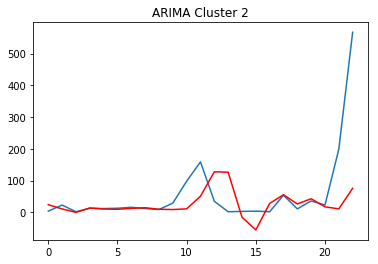

In [8]:
series = pd.read_csv('cluster_2_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.title("ARIMA Cluster 2")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()